<a href="https://colab.research.google.com/github/Rachael-Osoro/phase_3_project/blob/main/H1N1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer



In [ ]:
# loading dataset
features = pd.read_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/training_set_features.csv')
training_set_labels = pd.read_csv('/content/gdrive/MyDrive/phase_3/H1N1_data/training_set_labels.csv')

In [ ]:
# displaying dataset
display(features.shape)
display(features.head())

(26707, 36)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

The training set features are 36 columns and 26707 records of all participants. 

Onto our target variables:

* ```h1n1_vaccine``` - Whether respondent received H1N1 flu vaccine.

* ```seasonal_vaccine``` - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both.

In [ ]:
# shape and info of target variable
display(training_set_labels.shape)
display(training_set_labels.head())

(26707, 3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
# look at the info and null values for the target variables

display(training_set_labels.info())
print('\n')
display(training_set_labels.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


None

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

The target variables have the right datatypes and no null values. Great! we will do a some exploratory analysis.

# **DATA EXPLORATION**

## 1.1 H1N1 (Swine flu) Vaccination

In [ ]:
# explore the number of people vaccinated vs those not vaccinated
print('H1N1 vaccination count: \n',
      training_set_labels['h1n1_vaccine'].value_counts())

print('H1N1 vaccination count normalized: \n',
      training_set_labels['h1n1_vaccine'].value_counts(normalize=True))



H1N1 vaccination count: 
 0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
H1N1 vaccination count normalized: 
 0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64


There seams to be a class imbalance between those vaccinated against swine flu, class 0, with about 79% compared to 21% of class 1. Graphically displayed below:

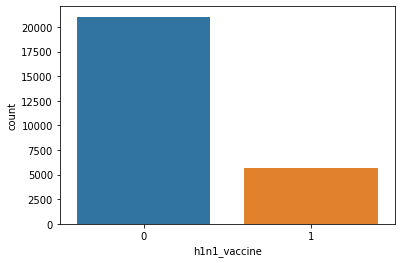

In [ ]:
# H1N1 vaccine distribution graphically

sns.countplot(data=training_set_labels, x='h1n1_vaccine');


## 1.2 Seasonal Flu Vaccination

In [ ]:
print('H1N1 vaccination count: \n',
      training_set_labels['seasonal_vaccine'].value_counts())

print('H1N1 vaccination count normalized: \n',
      training_set_labels['seasonal_vaccine'].value_counts(normalize=True))


H1N1 vaccination count: 
 0    14272
1    12435
Name: seasonal_vaccine, dtype: int64
H1N1 vaccination count normalized: 
 0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64


Seasonal flu vaccination has a fairly well balance between those not vaccinated, class 0, at about 53% and class 1 is about 47%. Graphically illustrated below:

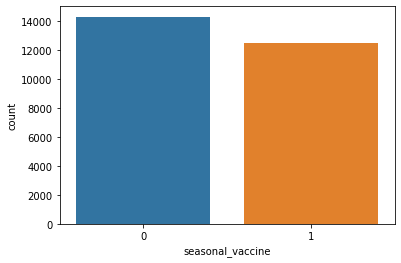

In [ ]:
# looking at seasonal_vaccine distribution graphically
sns.countplot(data=training_set_labels, x='seasonal_vaccine');

In [ ]:
# let's display a cross tabulation of the two vaccines 
# to get a feel of H1N1 vaccine uptake compared to seasonal flu vaccine

cross_tab = pd.crosstab(training_set_labels.iloc[:,1],
                        training_set_labels.iloc[:,2],
                        normalize=True)

cross_tab

seasonal_vaccine,0,1
h1n1_vaccine,,
0,0.497810,0.289737
1,0.036582,0.175871


About half of the participants did not receive any of the two vaccines. 29% were vaccinated again seasonal flu but not vaccinated against H1N1. 4% people received H1N1 vaccined but not the seasonal flu vaccine. Only 17% received both vaccines. Overall, poor vaccine uptake but people were more receptive of seasonal flu vaccine compared to H1N1. Could be due to a couple of resons: seasonal flu is perennial, it's vaccine is readily availbale. H1N1 flu was a pandemic that resolved, people did not feel the need to be vaccinated once it was over. Maybe, H1N1 vaccines were not readily available for uptake.

## 2 Exploring Featurs of the dataset

The dataset contains 36 columns. The first column ```respondent_id``` is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

1. ```h1n1_concern``` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

2. ```h1n1_knowledge``` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

3. ```behavioral_antiviral_meds``` - Has taken antiviral medications. (binary)
4. ```behavioral_avoidance``` - Has avoided close contact with others with flu-like symptoms. (binary)

5. ```behavioral_face_mask``` - Has bought a face mask. (binary)

6. ```behavioral_wash_hands``` - Has frequently washed hands or used hand sanitizer. (binary)
7. ```behavioral_large_gatherings``` - Has reduced time at large gatherings. (binary)
8. ```behavioral_outside_home``` - Has reduced contact with people outside of own household. (binary)
9. ```behavioral_touch_face``` - Has avoided touching eyes, nose, or mouth. (binary)
10. ```doctor_recc_h1n1``` - H1N1 flu vaccine was recommended by doctor. (binary)
11. ``doctor_recc_seasonal``` - Seasonal flu vaccine was recommended by doctor. (binary)
12. ```chronic_med_condition``` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
13. ```child_under_6_months``` - Has regular close contact with a child under the age of six months. (binary)
14. ```health_worker``` - Is a healthcare worker. (binary)
15. ```health_insurance``` - Has health insurance. (binary)
16. ```opinion_h1n1_vacc_effective``` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
17. ```opinion_h1n1_risk``` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
18. ```opinion_h1n1_sick_from_vacc``` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
19. ```opinion_seas_vacc_effective``` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
20. ```opinion_seas_risk``` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
21. ```opinion_seas_sick_from_vacc``` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
22. ```age_group``` - Age group of respondent.
23. ```education``` - Self-reported education level.
24. ```race``` - Race of respondent.
25. ```sex``` - Sex of respondent.
26. ```income_poverty``` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
27. ```marital_status``` - Marital status of respondent.
28. ```rent_or_own``` - Housing situation of respondent.
29. ```employment_status``` - Employment status of respondent.
30. ```hhs_geo_region``` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
31. ```census_msa``` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
32. ```household_adults``` - Number of other adults in household, top-coded to 3.
33. ```household_children``` - Number of children in household, top-coded to 3.
34. ```employment_industry``` - Type of industry respondent is employed in. Values are represented as short random character strings.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.
35. ```employment_occupation``` - Type of occupation of respondent. Values are represented as short random character strings.


### Null Values

In [ ]:
# percentage of missing values
missing = features.isna().sum()*100/ len(features)
missing = pd.DataFrame({'column_name': features.columns,
                        'percent_missing': missing})
                       
missing[missing['percent_missing']>20]

,column_name,percent_missing
health_insurance,health_insurance,45.957989
employment_industry,employment_industry,49.912008
employment_occupation,employment_occupation,50.436215


In [ ]:
# drop columns with more than 20% null values
to_drop = features[['health_insurance', 'employment_industry', 'employment_occupation']]

# drop columns
features.drop(columns=to_drop, axis=1, inplace=True)
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


In [ ]:
features.isna().sum()

respondent_id                     0
h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

Start with numeric columns. Replace null values with the median of each column.

In [ ]:
numeric = features.dtypes != 'object'
numeric_cols = features.columns[numeric]
numeric_df = features[numeric_cols]
numeric_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [ ]:
# using sklearn SimpleImputer with strategy=median
# replace null values with median
# instantiating SimpleImputer 

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

#fit_transform SimpleImputer, convert results to dataframe
imputed_num = pd.DataFrame(imp_median.fit_transform(numeric_df), 
                           index=numeric_df.index, 
                           columns=numeric_df.columns)

imputed_num.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

Onto the non numeric features

In [ ]:
cats= features.dtypes == 'object'
cat_vars = features[features.columns[cats]]

cat_vars

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA


In [ ]:
cat_vars.isna().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

In [ ]:
categ = cat_vars.copy()
categ= categ.fillna({'education': 'unknown', 
                           'income_poverty': '<= $75,000, Above Poverty', #mode/median in dataset
                           'marital_status': 'unknown', 
                           'rent_or_own': 'unknown', 
                           'employment_status': 'unknown'})
categ.isna().sum()

age_group            0
education            0
race                 0
sex                  0
income_poverty       0
marital_status       0
rent_or_own          0
employment_status    0
hhs_geo_region       0
census_msa           0
dtype: int64

In [ ]:
# join the numerical and non-numeric dataframes into one
pd.set_option('display.max_columns', 40)
df = pd.concat([imputed_num, categ], axis=1)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


In [ ]:
non_numeric =df[['age_group', 'education', 'race',	'sex',	'income_poverty',	'marital_status',	'rent_or_own', 'employment_status',	'hhs_geo_region',	'census_msa']]

#def convert_cats(data, column):
 # for col in data.columns:
  #  col = col.replace('col.values[0]', 0).astype(int)
                 #('col.values[1]', 1)
                 #'col.values[2]', 2)
                #)
 # return df


num = non_numeric.copy()
num = num.iloc[:, 0:9].astype('category')




# **2. Preprocessing**

In [ ]:
from sklearn import preprocessing
for col in num.columns:
#from sklearn import preprocessing
  le = preprocessing.OrdinalEncoder()
  num1 = le.fit_transform(num)
num1 = pd.DataFrame(data=num1, columns=num.columns, index=num.index)
num1

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,income_povert
0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,8.0,0.0
1,4.0,2.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0
2,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,1.0
3,0.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,5.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,0.0
26703,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,6.0,1.0
26704,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,0.0
26705,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0


In [ ]:
num.age_group = num.age_group.replace({'65+ Years': 0, 
                                      '55 - 64 Years': 1, 
                                      '45 - 54 Years': 2, 
                                      '18 - 34 Years': 3, 
                                      '35 - 44 Years': 4
                                      })

In [ ]:
num['sex'] = num.sex.replace({'Female': 0, 'Male': 1})

In [ ]:
num['income_poverty'].value_counts()

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [ ]:
num['income_povert'] = num.sex.replace({'<= $75,000, Above Poverty': 0,
                                        '> $75,000': 1,
                                        'Below Poverty': 2})

In [ ]:
num['education'] = num['education'].replace({'College Graduate': 0, 
                                             'Some College': 1, 
                                             '12 Years': 2, 
                                             '< 12 Years': 3, 
                                             'unknown': 4})
num['education']

0        3
1        2
2        0
3        2
4        1
        ..
26702    1
26703    0
26704    1
26705    1
26706    1
Name: education, Length: 26707, dtype: int64

In [ ]:
num['race'] = num['race'].replace({'White': 0, 
                           'Black': 1, 
                           'Hispanic': 2, 
                           'Other or Multiple': 3})

In [ ]:
def convert_cats(data, column):
  for idx, col in enumerate(data):
      col = col.replace('col.values[0]', 0)#('col.values[1]', 1), ('col.values[2]', 2))

      return col


In [ ]:
for idx, col in enumerate(num):
  print(col)

age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region


In [ ]:

convert_cats(num, education)

NameError: ignored

In [ ]:
non_numeric.iloc[:, 1]

0              < 12 Years
1                12 Years
2        College Graduate
3                12 Years
4            Some College
               ...       
26702        Some College
26703    College Graduate
26704        Some College
26705        Some College
26706        Some College
Name: education, Length: 26707, dtype: object

In [ ]:
non_numeric

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,unknown,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA


In [ ]:
features['income_poverty'].values[0]

'Below Poverty'

In [ ]:
cat_vars['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [ ]:
cat_vars['rent_or_own'].value_counts()

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

In [ ]:
cat_vars['employment_status'].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [ ]:
cat_vars['hhs_geo_region'].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [ ]:
cat_vars['census_msa'].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [ ]:
features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

Text(0.5, 0.98, 'Categorical Plotting')

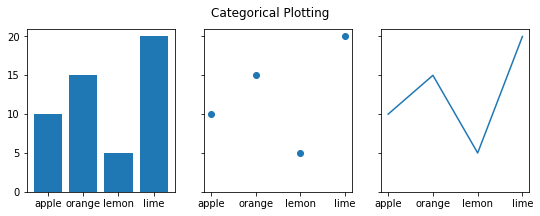

In [ ]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [ ]:
# let's see how many people received both vaccine

vaxxed = training_set_labels[(training_set_labels['h1n1_vaccine'] == 1) & (training_set_labels['seasonal_vaccine']==1)]
vaxxed.count()
#training_set_labels['seasonal_vaccine']


respondent_id       4697
h1n1_vaccine        4697
seasonal_vaccine    4697
dtype: int64